In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV

csv_df = pd.read_csv("mrv_database_done.csv", delimiter=';', encoding='utf-8-sig', decimal=',')

# Feature engineering
csv_df['hour'] = csv_df['time'].str.extract(r'(\d+):').astype(float)
csv_df['day_of_week'] = pd.to_datetime(csv_df['date'], dayfirst=True, errors='coerce').dt.dayofweek
csv_df['month'] = pd.to_datetime(csv_df['date'], dayfirst=True, errors='coerce').dt.month
csv_df['has_injure'] = csv_df['injured'].map({'–¥–∞': 1, '–Ω–µ': 0})
csv_df['has_died'] = csv_df['died'].map({'–¥–∞': 1, '–Ω–µ': 0})


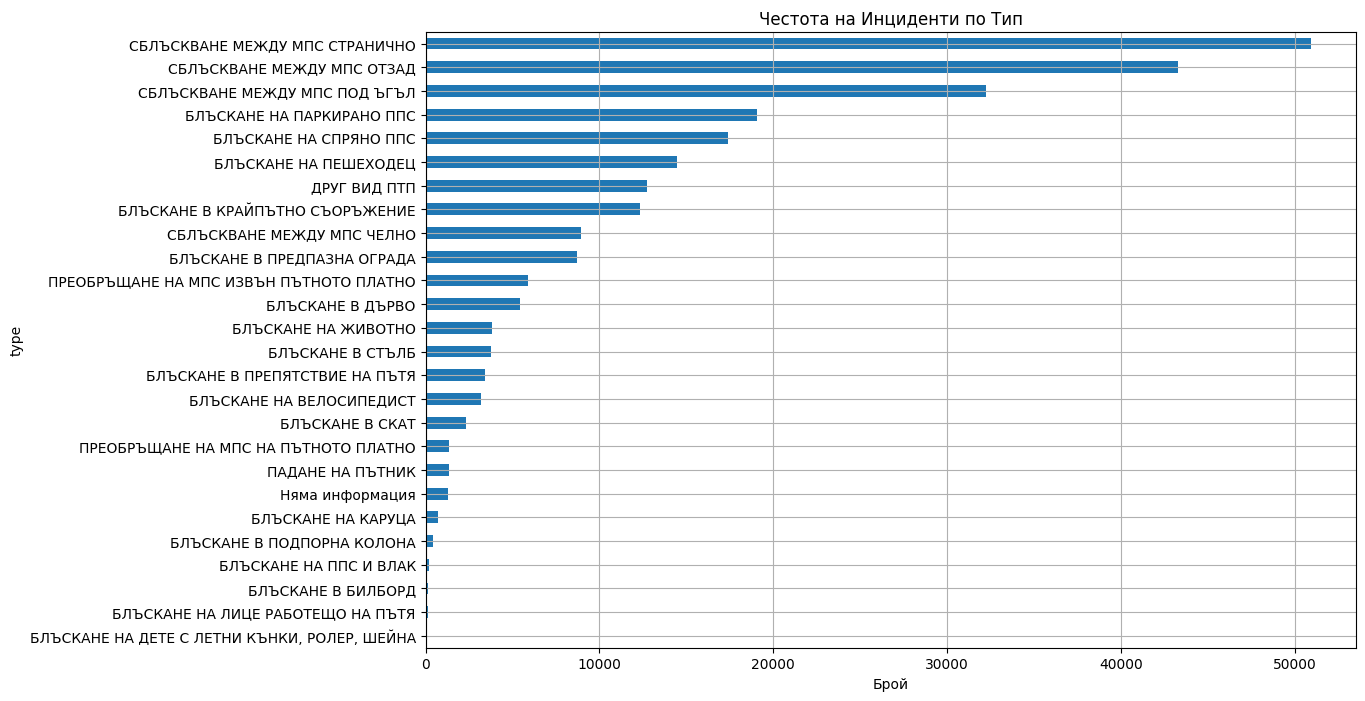

In [20]:

type_counts = csv_df['type'].value_counts()
type_counts.plot(kind='barh', figsize=(12, 8), title='–ß–µ—Å—Ç–æ—Ç–∞ –Ω–∞ –ò–Ω—Ü–∏–¥–µ–Ω—Ç–∏ –ø–æ –¢–∏–ø')
plt.xlabel("–ë—Ä–æ–π")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


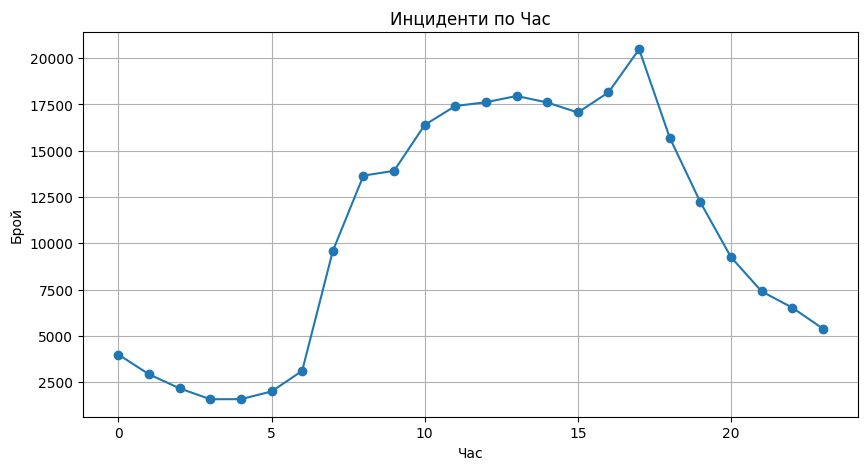

In [21]:

hour_counts = csv_df['hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(hour_counts.index, hour_counts.values, marker='o')
plt.title("–ò–Ω—Ü–∏–¥–µ–Ω—Ç–∏ –ø–æ –ß–∞—Å")
plt.xlabel("–ß–∞—Å")
plt.ylabel("–ë—Ä–æ–π")
plt.grid(True)
plt.show()


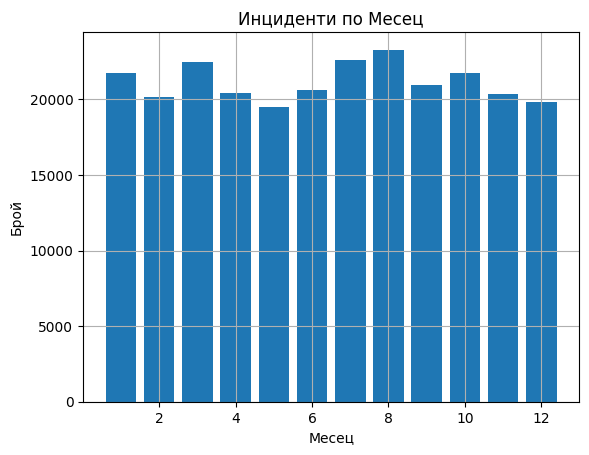

In [22]:

month_counts = csv_df['month'].value_counts().sort_index()
plt.bar(month_counts.index, month_counts.values)
plt.title("–ò–Ω—Ü–∏–¥–µ–Ω—Ç–∏ –ø–æ –ú–µ—Å–µ—Ü")
plt.xlabel("–ú–µ—Å–µ—Ü")
plt.ylabel("–ë—Ä–æ–π")
plt.grid(True)
plt.show()


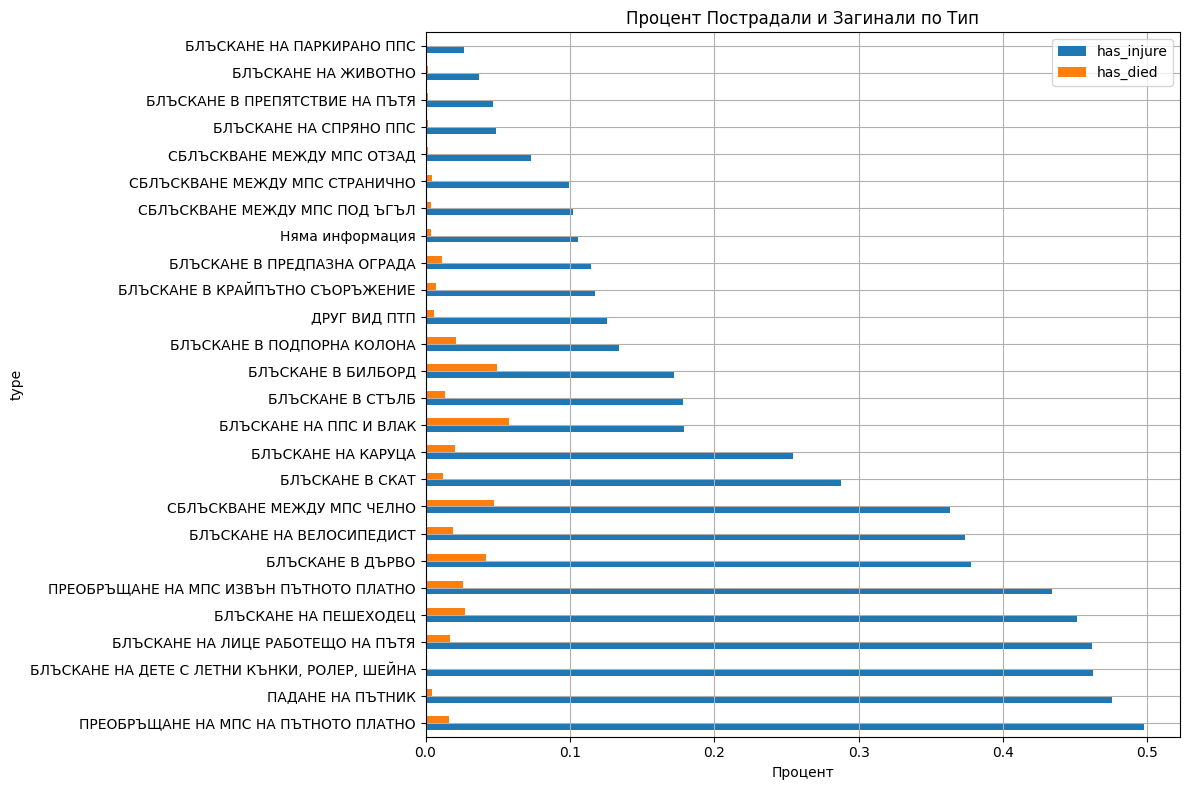

In [23]:

csv_df.groupby('type')[['has_injure', 'has_died']].mean().sort_values(by='has_injure', ascending=False).plot(kind='barh', figsize=(12, 8))
plt.title("–ü—Ä–æ—Ü–µ–Ω—Ç –ü–æ—Å—Ç—Ä–∞–¥–∞–ª–∏ –∏ –ó–∞–≥–∏–Ω–∞–ª–∏ –ø–æ –¢–∏–ø")
plt.xlabel("–ü—Ä–æ—Ü–µ–Ω—Ç")
plt.grid(True)
plt.tight_layout()
plt.show()


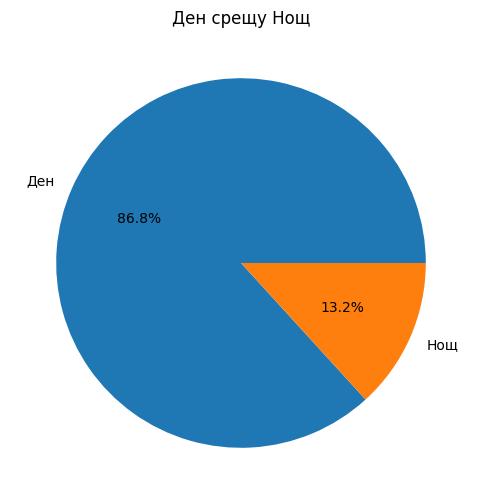

In [24]:

csv_df['time_of_day'] = csv_df['hour'].apply(lambda h: '–ù–æ—â' if h < 6 or h >= 21 else '–î–µ–Ω')
csv_df['time_of_day'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title="–î–µ–Ω —Å—Ä–µ—â—É –ù–æ—â")
plt.ylabel("")
plt.show()


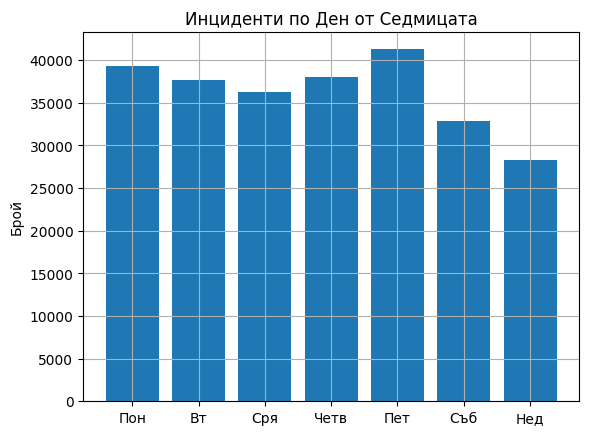

In [25]:

days = ['–ü–æ–Ω', '–í—Ç', '–°—Ä—è', '–ß–µ—Ç–≤', '–ü–µ—Ç', '–°—ä–±', '–ù–µ–¥']
dow_counts = csv_df['day_of_week'].value_counts().sort_index()
plt.bar(days, dow_counts)
plt.title("–ò–Ω—Ü–∏–¥–µ–Ω—Ç–∏ –ø–æ –î–µ–Ω –æ—Ç –°–µ–¥–º–∏—Ü–∞—Ç–∞")
plt.ylabel("–ë—Ä–æ–π")
plt.grid(True)
plt.show()


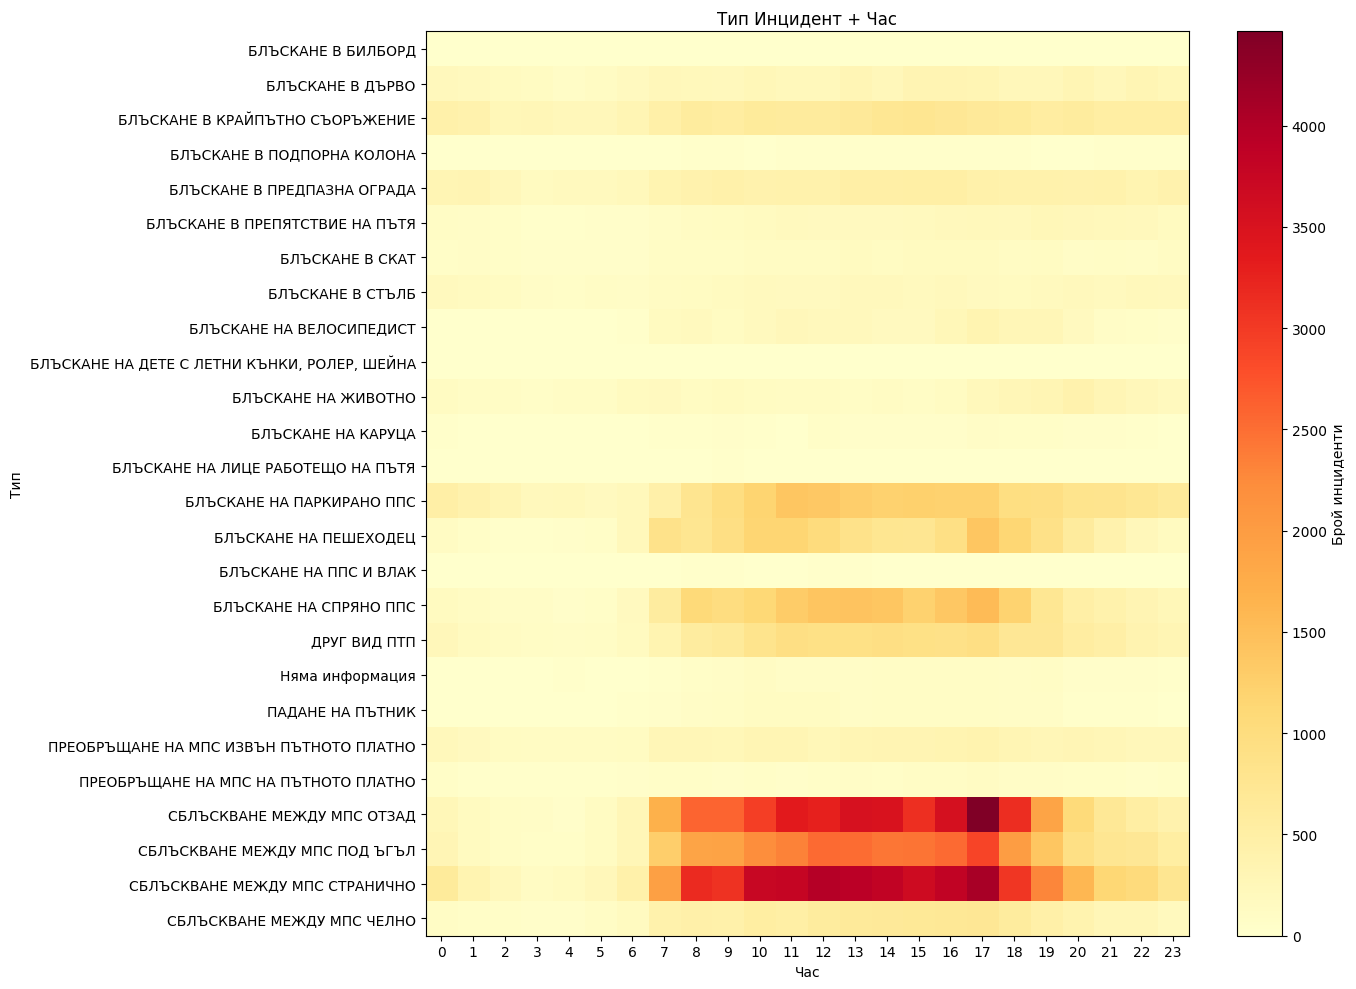

In [26]:

pivot = csv_df.pivot_table(index='type', columns='hour', values='year', aggfunc='count', fill_value=0)
plt.figure(figsize=(14, 10))
plt.imshow(pivot, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='–ë—Ä–æ–π –∏–Ω—Ü–∏–¥–µ–Ω—Ç–∏')
plt.xticks(ticks=np.arange(0, 24), labels=np.arange(0, 24))
plt.yticks(ticks=np.arange(len(pivot.index)), labels=pivot.index)
plt.title("–¢–∏–ø –ò–Ω—Ü–∏–¥–µ–Ω—Ç + –ß–∞—Å")
plt.xlabel("–ß–∞—Å")
plt.ylabel("–¢–∏–ø")
plt.tight_layout()
plt.show()


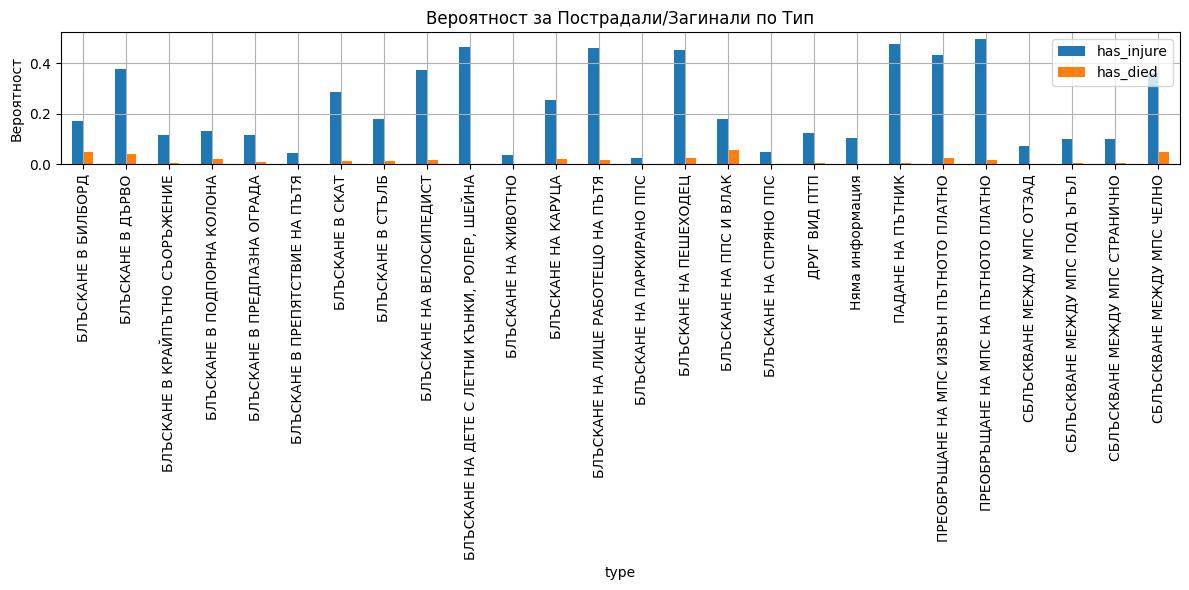

In [27]:

probs = csv_df.groupby('type')[['has_injure', 'has_died']].mean()
probs.plot(kind='bar', figsize=(12, 6), title="–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç –∑–∞ –ü–æ—Å—Ç—Ä–∞–¥–∞–ª–∏/–ó–∞–≥–∏–Ω–∞–ª–∏ –ø–æ –¢–∏–ø")
plt.ylabel("–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç")
plt.grid(True)
plt.tight_layout()
plt.show()


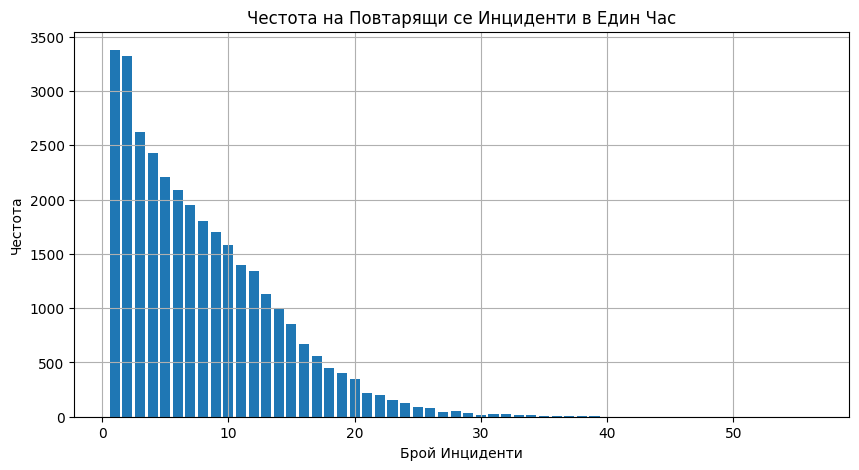

In [28]:

# Count same hour events
hourly_dups = csv_df.groupby(['date', 'hour']).size().value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(hourly_dups.index, hourly_dups.values)
plt.title("–ß–µ—Å—Ç–æ—Ç–∞ –Ω–∞ –ü–æ–≤—Ç–∞—Ä—è—â–∏ —Å–µ –ò–Ω—Ü–∏–¥–µ–Ω—Ç–∏ –≤ –ï–¥–∏–Ω –ß–∞—Å")
plt.xlabel("–ë—Ä–æ–π –ò–Ω—Ü–∏–¥–µ–Ω—Ç–∏")
plt.ylabel("–ß–µ—Å—Ç–æ—Ç–∞")
plt.grid(True)
plt.show()


üìå –ó–∞–∫–ª—é—á–µ–Ω–∏–µ –æ—Ç –ê–Ω–∞–ª–∏–∑–∞ –Ω–∞ –î–∞–Ω–Ω–∏ –∑–∞ –ü—ä—Ç–Ω–æ—Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–Ω–∏ –ü—Ä–æ–∏–∑—à–µ—Å—Ç–≤–∏—è (–ë–µ–∑ –ì–µ–æ–≥—Ä–∞—Ñ—Å–∫–∏ –î–∞–Ω–Ω–∏)
–°–ª–µ–¥ –ø—Ä–æ–≤–µ–∂–¥–∞–Ω–µ—Ç–æ –Ω–∞ —Å–µ—Ä–∏—è –æ—Ç –∑–∞–¥—ä–ª–±–æ—á–µ–Ω–∏ –∞–Ω–∞–ª–∏–∑–∏ –≤—ä—Ä—Ö—É –∏–Ω—Ü–∏–¥–µ–Ω—Ç–∏ –≤ –ë—ä–ª–≥–∞—Ä–∏—è (–±–µ–∑ –∏–∑–ø–æ–ª–∑–≤–∞–Ω–µ –Ω–∞ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∏), —Å–µ –æ—á–µ—Ä—Ç–∞—Ö–∞ —Å–ª–µ–¥–Ω–∏—Ç–µ –∫–ª—é—á–æ–≤–∏ –∏–∑–≤–æ–¥–∏ –∏ —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏:

üß† 1. –ù–∞–π-—á–µ—Å—Ç–∏ –¢–∏–ø–æ–≤–µ –ò–Ω—Ü–∏–¥–µ–Ω—Ç–∏
"–ë–ª—ä—Å–∫–∞–Ω–µ –≤ –∫—Ä–∞–π–ø—ä—Ç–Ω–æ —Å—ä–æ—Ä—ä–∂–µ–Ω–∏–µ" –µ –Ω–∞–π-—Ä–∞–∑–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è—Ç —Ç–∏–ø –∏–Ω—Ü–∏–¥–µ–Ω—Ç, –∫–æ–µ—Ç–æ –º–æ–∂–µ –¥–∞ —Å–∏–≥–Ω–∞–ª–∏–∑–∏—Ä–∞ –∑–∞ –∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä–Ω–∏ —Å–ª–∞–±–æ—Å—Ç–∏.

"–°–±–ª—ä—Å–∫–≤–∞–Ω–µ –º–µ–∂–¥—É –ú–ü–° —Å—Ç—Ä–∞–Ω–∏—á–Ω–æ" –∏ "–ë–ª—ä—Å–∫–∞–Ω–µ –Ω–∞ –ø–µ—à–µ—Ö–æ–¥–µ—Ü" —Å–∞ —Å—ä—â–æ —Å—Ä–µ–¥ –≤–æ–¥–µ—â–∏—Ç–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ ‚Äì –∫—Ä–∏—Ç–∏—á–Ω–∏ –∑–∞ –ø—ä—Ç–Ω–∞—Ç–∞ –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç.

üïë 2. –í—Ä–µ–º–µ–≤–∏ –ê–Ω–∞–ª–∏–∑–∏
–ü–∏–∫–æ–≤–∏ —á–∞—Å–æ–≤–µ: –ò–Ω—Ü–∏–¥–µ–Ω—Ç–∏—Ç–µ —Å–µ –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∏—Ä–∞—Ç –≤ —Å—É—Ç—Ä–µ—à–Ω–∏—Ç–µ –∏ —Å–ª–µ–¥–æ–±–µ–¥–Ω–∏—Ç–µ —á–∞—Å–æ–≤–µ (8:00, 14:00, 17:00), –∫–æ–µ—Ç–æ —Å—ä–≤–ø–∞–¥–∞ —Å –ø–µ—Ä–∏–æ–¥–∏—Ç–µ –Ω–∞ –≤–∏—Å–æ–∫–∞ —Ç—Ä–∞—Ñ–∏–∫–æ–≤–∞ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç.

–ü–æ –¥–Ω–∏ –æ—Ç —Å–µ–¥–º–∏—Ü–∞—Ç–∞: –ü–æ–Ω–µ–¥–µ–ª–Ω–∏–∫ –∏ –ø–µ—Ç—ä–∫ –≤–æ–¥—è—Ç, –≤–µ—Ä–æ—è—Ç–Ω–æ –ø–æ—Ä–∞–¥–∏ –Ω–∞—á–∞–ª–æ/–∫—Ä–∞–π –Ω–∞ —Ä–∞–±–æ—Ç–Ω–∞—Ç–∞ —Å–µ–¥–º–∏—Ü–∞.

–ü–æ –º–µ—Å–µ—Ü–∏: –ü–æ–≤–∏—à–µ–Ω–∞ —á–µ—Å—Ç–æ—Ç–∞ –ø—Ä–µ–∑ –ª–µ—Ç–Ω–∏—Ç–µ –º–µ—Å–µ—Ü–∏ (—é–ª–∏ –∏ –∞–≤–≥—É—Å—Ç), –∫–æ–µ—Ç–æ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞ —Å–µ–∑–æ–Ω–µ–Ω —Ä–∏—Å–∫ ‚Äì –ø–æ–≤–µ—á–µ –¥–≤–∏–∂–µ–Ω–∏–µ –ø–æ –ø—ä—Ç–∏—â–∞—Ç–∞.

‚ö†Ô∏è 3. –û–ø–∞—Å–Ω–∏ –¢–∏–ø–æ–≤–µ –ò–Ω—Ü–∏–¥–µ–Ω—Ç–∏
"–ë–ª—ä—Å–∫–∞–Ω–µ –Ω–∞ –ø–µ—à–µ—Ö–æ–¥–µ—Ü" –ø–æ–∫–∞–∑–≤–∞ –≤–∏—Å–æ–∫–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç –∑–∞ –Ω–∞—Ä–∞–Ω—è–≤–∞–Ω–∏—è, –Ω–∞–¥–≤–∏—à–∞–≤–∞—â–∞ –º–Ω–æ–≥–æ –¥—Ä—É–≥–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏.

–ù—è–∫–æ–∏ –ø–æ-—Ä–µ–¥–∫–∏ –∏–Ω—Ü–∏–¥–µ–Ω—Ç–∏ —Å—ä—â–æ –∏–º–∞—Ç –∏–∑–∫–ª—é—á–∏—Ç–µ–ª–Ω–æ –≤–∏—Å–æ–∫ –¥—è–ª –Ω–∞ –ø–æ—Å—Ç—Ä–∞–¥–∞–ª–∏ –∏–ª–∏ –∑–∞–≥–∏–Ω–∞–ª–∏, –∫–æ–µ—Ç–æ –ø–æ–∫–∞–∑–≤–∞ –Ω—É–∂–¥–∞—Ç–∞ –æ—Ç –ø—Ä–∏–æ—Ä–∏—Ç–µ—Ç–Ω–æ –≤–Ω–∏–º–∞–Ω–∏–µ, –≤—ä–ø—Ä–µ–∫–∏ –Ω–∏—Å–∫–∞—Ç–∞ —á–µ—Å—Ç–æ—Ç–∞.

üåô 4. –î–µ–Ω vs –ù–æ—â
–ü–æ–≤–µ—á–µ—Ç–æ –∏–Ω—Ü–∏–¥–µ–Ω—Ç–∏ —Å–µ —Å–ª—É—á–≤–∞—Ç –ø—Ä–µ–∑ –¥–µ–Ω—è (~75%), –Ω–æ –Ω–æ—â–Ω–∏—Ç–µ –∏–Ω—Ü–∏–¥–µ–Ω—Ç–∏ —á–µ—Å—Ç–æ —Å–∞ –ø–æ-—Ç–µ–∂–∫–∏ –ø–æ—Ä–∞–¥–∏ –Ω–∞–º–∞–ª–µ–Ω–∞ –≤–∏–¥–∏–º–æ—Å—Ç –∏ –ø–æ-–≤–∏—Å–æ–∫–∏ —Å–∫–æ—Ä–æ—Å—Ç–∏.

üîÑ 5. –ü–æ–≤—Ç–∞—Ä—è–µ–º–æ—Å—Ç –∏ –°—ä–≤–ø–∞–¥–µ–Ω–∏—è –ø–æ –ß–∞—Å
–í —Ä–∞–º–∫–∏—Ç–µ –Ω–∞ –µ–¥–∏–Ω –∏ —Å—ä—â —á–∞—Å –Ω–∞ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–∏ –¥–∞—Ç–∏ —á–µ—Å—Ç–æ —Å–µ –Ω–∞–±–ª—é–¥–∞–≤–∞—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ –∏–Ω—Ü–∏–¥–µ–Ω—Ç–∏, –∫–æ–µ—Ç–æ –ø–æ–∫–∞–∑–≤–∞:

–û–±—â–∏ –ø–∏–∫–æ–≤–∏ –Ω–∞—Ç–æ–≤–∞—Ä–≤–∞–Ω–∏—è –ø–æ –ø—ä—Ç–∏—â–∞—Ç–∞.

–ü–æ—Ç–µ–Ω—Ü–∏–∞–ª –∑–∞ –Ω–∞—Ç—Ä—É–ø–≤–∞–Ω–µ –Ω–∞ —Ä–∏—Å–∫–æ–≤–µ, –æ—Å–æ–±–µ–Ω–æ –≤ –Ω–∞—Ç–æ–≤–∞—Ä–µ–Ω–∏ —É—á–∞—Å—Ç—ä—Ü–∏.

‚úÖ –û–±–æ–±—â–µ–Ω–æ:
–°—ä—â–µ—Å—Ç–≤—É–≤–∞—Ç —è—Å–Ω–∏ –≤—Ä–µ–º–µ–≤–∏ –∏ –ø–æ–≤–µ–¥–µ–Ω—á–µ—Å–∫–∏ –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏ –≤ –∏–Ω—Ü–∏–¥–µ–Ω—Ç–∏—Ç–µ.

–¢–∏–ø—ä—Ç –∏–Ω—Ü–∏–¥–µ–Ω—Ç –µ —Å–∏–ª–µ–Ω –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä –∑–∞ —Ç–µ–∂–µ—Å—Ç—Ç–∞ –º—É (–ø–æ—Å—Ç—Ä–∞–¥–∞–ª–∏/–∑–∞–≥–∏–Ω–∞–ª–∏).

–°–µ–∑–æ–Ω—ä—Ç, —á–∞—Å—ä—Ç –∏ –¥–µ–Ω—è—Ç –≤–ª–∏—è—è—Ç –∑–Ω–∞—á–∏–º–æ –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—Ç–∞ –∑–∞ –∏–Ω—Ü–∏–¥–µ–Ω—Ç.

–î–∞–Ω–Ω–∏—Ç–µ —Ä–∞–∑–∫—Ä–∏–≤–∞—Ç –≤—ä–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –∑–∞ –ø—Ä–µ–≤–∞–Ω—Ç–∏–≤–Ω–∏ –¥–µ–π—Å—Ç–≤–∏—è, –æ—Å–æ–±–µ–Ω–æ –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –Ω–∞ –ø–µ—à–µ—Ö–æ–¥—Ü–∏, –∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –∏ –Ω–∞—Ç–æ–≤–∞—Ä–µ–Ω–∏ –ø–µ—Ä–∏–æ–¥–∏.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Prepare dataset: drop rows with missing coordinates or time
model_df = csv_df.dropna(subset=['x', 'y', 'time'])

# Feature engineering
model_df['hour'] = model_df['time'].str.extract(r'(\d+):').astype(float)
model_df['day'] = pd.to_datetime(model_df['date'], dayfirst=True, errors='coerce').dt.dayofweek
model_df['month'] = pd.to_datetime(model_df['date'], dayfirst=True, errors='coerce').dt.month
model_df['has_injure'] = model_df['injured'].map({'–¥–∞': 1, '–Ω–µ': 0})
model_df['has_died'] = model_df['died'].map({'–¥–∞': 1, '–Ω–µ': 0})
model_df['incident'] = model_df['has_injure'] | model_df['has_died']

# Simulate negative samples (locations with no incidents)
import numpy as np
neg_samples = model_df.sample(n=1000, random_state=42).copy()
neg_samples['incident'] = 0
neg_samples[['has_injure', 'has_died']] = 0

# Merge positive and synthetic negative examples
training_df = pd.concat([model_df[model_df['incident'] == 1], neg_samples])

# Select features and target
features = ['x', 'y', 'hour', 'day', 'month', 'type']
X = training_df[features]
y = training_df['incident']

# Preprocessing
cat_features = ['type']
num_features = ['x', 'y', 'hour', 'day', 'month']
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Train-test split and model pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
model = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, random_state=42))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
report = classification_report(y_test, y_pred, output_dict=True)
auc_score = roc_auc_score(y_test, y_prob)

report, auc_score


/tmp/ipython-input-29-1463793842.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['hour'] = model_df['time'].str.extract(r'(\d+):').astype(float)
/tmp/ipython-input-29-1463793842.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['day'] = pd.to_datetime(model_df['date'], dayfirst=True, errors='coerce').dt.dayofweek
/tmp/ipython-input-29-1463793842.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

({'0': {'precision': 0.05555555555555555,
   'recall': 0.01,
   'f1-score': 0.01694915254237288,
   'support': 300.0},
  '1': {'precision': 0.9627165453175998,
   'recall': 0.9933937823834197,
   'f1-score': 0.9778146117557057,
   'support': 7720.0},
  'accuracy': 0.9566084788029925,
  'macro avg': {'precision': 0.5091360504365776,
   'recall': 0.5016968911917098,
   'f1-score': 0.4973818821490393,
   'support': 8020.0},
  'weighted avg': {'precision': 0.9287828424586704,
   'recall': 0.9566084788029925,
   'f1-score': 0.941872013530768,
   'support': 8020.0}},
 np.float64(0.6882767702936097))

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Limit to top 5 most common types to avoid explosion in one-hot encoding
top_types = csv_df['type'].value_counts().nlargest(5).index
ml_df_small = csv_df[csv_df['type'].isin(top_types)].dropna(subset=['hour', 'day_of_week', 'month'])

# Add engineered fields
ml_df_small['has_injure'] = ml_df_small['injured'].map({'–¥–∞': 1, '–Ω–µ': 0})
ml_df_small['has_died'] = ml_df_small['died'].map({'–¥–∞': 1, '–Ω–µ': 0})
ml_df_small['incident'] = ml_df_small['has_injure'] | ml_df_small['has_died']

# Features and Target
X_small = ml_df_small[['hour', 'day_of_week', 'month', 'type']]
y_small = ml_df_small['incident']
X_small = pd.get_dummies(X_small, columns=['type'])

# Train-test split and model
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_small, y_small, test_size=0.3, random_state=42, stratify=y_small)
model_s = GradientBoostingClassifier(n_estimators=120, random_state=42)
model_s.fit(X_train_s, y_train_s)

# Predict and evaluate
y_pred_s = model_s.predict(X_test_s)
y_prob_s = model_s.predict_proba(X_test_s)[:, 1]
roc_auc_s = roc_auc_score(y_test_s, y_prob_s)
report_s = classification_report(y_test_s, y_pred_s, output_dict=True)
conf_matrix_s = confusion_matrix(y_test_s, y_pred_s)

roc_auc_s, report_s, conf_matrix_s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(np.float64(0.6320742789860303),
 {'0': {'precision': 0.9178564123542646,
   'recall': 1.0,
   'f1-score': 0.9571690627532955,
   'support': 44874.0},
  '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4016.0},
  'accuracy': 0.9178564123542646,
  'macro avg': {'precision': 0.4589282061771323,
   'recall': 0.5,
   'f1-score': 0.47858453137664775,
   'support': 48890.0},
  'weighted avg': {'precision': 0.8424603936998419,
   'recall': 0.9178564123542646,
   'f1-score': 0.8785437619552338,
   'support': 48890.0}},
 array([[44874,     0],
        [ 4016,     0]]))

In [33]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Logistic Regression with class weights
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train_s, y_train_s)
y_log_pred = log_model.predict(X_test_s)
y_log_prob = log_model.predict_proba(X_test_s)[:, 1]
roc_auc_log = roc_auc_score(y_test_s, y_log_prob)
report_log = classification_report(y_test_s, y_log_pred, output_dict=True)
conf_matrix_log = confusion_matrix(y_test_s, y_log_pred)

# XGBoost with scale_pos_weight
scale_weight = (len(y_train_s) - sum(y_train_s)) / sum(y_train_s)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_weight, random_state=42)
xgb_model.fit(X_train_s, y_train_s)
y_xgb_pred = xgb_model.predict(X_test_s)
y_xgb_prob = xgb_model.predict_proba(X_test_s)[:, 1]
roc_auc_xgb = roc_auc_score(y_test_s, y_xgb_prob)
report_xgb = classification_report(y_test_s, y_xgb_pred, output_dict=True)
conf_matrix_xgb = confusion_matrix(y_test_s, y_xgb_pred)

{
    "Logistic Regression ROC-AUC": roc_auc_log,
    "Logistic Regression Conf Matrix": conf_matrix_log,
    "XGBoost ROC-AUC": roc_auc_xgb,
    "XGBoost Conf Matrix": conf_matrix_xgb
}

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'Logistic Regression ROC-AUC': np.float64(0.6067301941452001),
 'Logistic Regression Conf Matrix': array([[19926, 24948],
        [ 1139,  2877]]),
 'XGBoost ROC-AUC': np.float64(0.6403072555124246),
 'XGBoost Conf Matrix': array([[27038, 17836],
        [ 1643,  2373]])}

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with class_weight balanced
rf_model = RandomForestClassifier(n_estimators=150, class_weight='balanced', random_state=42)
rf_model.fit(X_train_s, y_train_s)

# Predictions and evaluation
y_rf_pred = rf_model.predict(X_test_s)
y_rf_prob = rf_model.predict_proba(X_test_s)[:, 1]
roc_auc_rf = roc_auc_score(y_test_s, y_rf_prob)
report_rf = classification_report(y_test_s, y_rf_pred, output_dict=True)
conf_matrix_rf = confusion_matrix(y_test_s, y_rf_pred)

roc_auc_rf, report_rf, conf_matrix_rf


(np.float64(0.6393347782600489),
 {'0': {'precision': 0.9391582932867336,
   'recall': 0.7185898292998173,
   'f1-score': 0.8142004065194611,
   'support': 44874.0},
  '1': {'precision': 0.1323943661971831,
   'recall': 0.47983067729083667,
   'f1-score': 0.20752786602767756,
   'support': 4016.0},
  'accuracy': 0.6989772959705461,
  'macro avg': {'precision': 0.5357763297419583,
   'recall': 0.599210253295327,
   'f1-score': 0.5108641362735693,
   'support': 48890.0},
  'weighted avg': {'precision': 0.8728878099324354,
   'recall': 0.6989772959705461,
   'f1-score': 0.7643661475173135,
   'support': 48890.0}},
 array([[32246, 12628],
        [ 2089,  1927]]))